# **Clasificador por CV**

## **Librererias y archivos** 

1. Importar las librerías 

In [1]:
import pandas as pd 
import DataReading
import GeneralProfiles
import SoftSkills
import CleanText
from DataReading import *
from SoftSkills import *
from CleanText import *

In [2]:
data = pd.read_csv(r'C:\Users\Fernando.DESKTOP-608G9HT\Documents\Cosas personales Fer\Python\Limpieza de datos\Database_empleos\New data\rawdata.csv')

In [3]:
#Objeto de clase
ObjReadD = DataReading.TransformdataCSV()
ObjGeneral = GeneralProfiles.GeneralProfiles()
DataSFEN = ObjReadD.ReadContentCSVSFEN()
DataMLE = ObjReadD.ReadContentCSVMLE()
DataCSE = ObjReadD.ReadContentCSVCSE()
DataDSC = ObjReadD.ReadContentCSVDSC()
GeneralSFEN = ObjGeneral.GeneralProfileSFEN(DataSFEN)
#GeneralMLE = ObjGeneral.GeneralProfileMLEngineer(DataMLE)
#GeneralDSC = ObjGeneral.GeneralProfileDSC(DataDSC)

In [4]:
ObjSS = SoftSkills.SoftSkill()
SoftSFEN = ObjSS.SFENSoftSkills(DataSFEN)

In [5]:
ObjC = CleanText()
CleanTextSFEN = ObjC.CleaningText(DataSFEN)
data = pd.DataFrame(CleanTextSFEN)

## **Clasificador**

### **Sección de NLP**

#### **Vectorización**

In [6]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

embeddedCandidates = []
#Sentences are encoded by calling model.encode()
embeddings = model.encode(CleanTextSFEN)
#Print the embeddings
for sentence, embedding in zip(CleanTextSFEN, embeddings):
    embeddedCandidates.append(embedding)

c:\Users\Fernando.DESKTOP-608G9HT\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
df1 = pd.DataFrame(embeddedCandidates)
df2 = pd.DataFrame(CleanTextSFEN).rename(columns={0:'Text'})
dFinalC = pd.concat([df2,df1], axis = 1)

In [8]:
dFinalC

,Text,0,1,2,3,4,5,6,7,8,...,374,375,376,377,378,379,380,381,382,383
0,Ruth Libowsky (She/Her)Software Engineer at Tr...,0.093439,-0.228814,0.118767,0.029917,0.182106,-0.012936,-0.052146,-0.014484,-0.357501,...,0.152699,0.240190,-0.095608,-0.362179,-0.640039,0.132981,-0.372900,-0.411824,0.231895,0.205617
1,Kevin JiangSenior Software Engineer at Instaca...,0.065288,-0.100972,0.028757,-0.319070,0.118035,-0.179666,-0.326845,0.062097,-0.213299,...,0.144112,0.188386,-0.144145,-0.429716,-0.642943,-0.074655,-0.263135,-0.280988,0.045374,0.368242
2,David ByrneSenior Software EngineerInfluxDataY...,-0.157894,-0.354875,-0.338139,-0.234077,0.030602,-0.078039,0.012305,-0.062966,-0.012517,...,0.109654,0.310261,0.233620,-0.563038,-0.379065,0.041764,-0.392358,-0.194671,-0.028193,-0.082761
3,Amalia HawkinsSoftware EngineerGoogleUniversit...,-0.010509,-0.305916,0.031546,-0.079703,0.117760,-0.096203,-0.379563,0.050066,-0.453905,...,0.119034,0.106255,0.039686,-0.302671,-0.243181,0.220579,-0.089857,-0.175926,0.191244,0.058088
4,Lester Kim (He/Him)Senior Software Engineer at...,-0.103556,-0.059175,-0.466041,-0.115597,-0.199573,0.148209,-0.051699,0.084350,-0.457870,...,0.344815,0.321481,0.251250,-0.460472,-0.426613,0.037697,-0.315723,-0.368274,-0.036814,0.001106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,J. M. M.PetrophysicistCentro Superior de Forma...,-0.064348,0.042672,0.096720,0.145306,0.119732,-0.392934,0.017087,0.102591,-0.003000,...,0.130671,0.161957,0.249268,0.012373,-0.144168,-0.192489,0.127957,0.027583,0.241034,-0.004347
398,Yael Isay Martinez GutierrezSoftware Developer...,-0.143650,-0.029884,-0.141249,-0.177348,0.333259,-0.179304,-0.026189,0.415083,-0.234613,...,0.288654,0.054762,0.439385,-0.018053,-0.483155,-0.089995,-0.574086,-0.275998,0.192624,0.111531
399,Tane tiene una cuenta premiumHaz clic para abo...,-0.190893,0.077657,-0.573271,-0.468546,0.205008,-0.219027,0.147430,0.056727,-0.187177,...,0.013111,0.071266,0.490488,-0.077976,-0.089267,0.380225,-0.177733,-0.349615,0.084287,0.424485
400,"Javier AlbaDevOps Ecommerce, Java ProgrammerAu...",0.093398,-0.315369,-0.265078,0.027730,0.159623,-0.225069,-0.145910,-0.000072,-0.018235,...,0.247761,-0.244120,0.078159,-0.232504,-0.304784,0.028185,-0.030930,-0.443128,0.254607,-0.101311


In [9]:
JobDescription = pd.read_csv('JobDescriptionFull.csv')
JobDescription = JobDescription.fillna(0)
JobDescription = JobDescription[JobDescription.Description != 0]
Description = JobDescription.Description.to_list()

In [10]:
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
embeddedOffers = []
embeddingsJobDescription = model.encode(Description)

for sentences, embeddings in zip(Description, embeddingsJobDescription):
    embeddedOffers.append(embeddings)

In [11]:
df3 = pd.DataFrame(embeddedOffers)
df4 = pd.DataFrame(Description).rename(columns= {0: 'Text'})
dFinalO = pd.concat([df4,df3], axis = 1)

In [12]:
dFinalO

,Text,0,1,2,3,4,5,6,7,8,...,374,375,376,377,378,379,380,381,382,383
0,\n\nJob Description Summary GE Digital Grid En...,-0.407479,0.080798,-0.185230,-0.176876,0.027512,-0.158306,-0.185128,0.344095,-0.329444,...,0.069426,0.013524,-0.005946,-0.214599,-0.461834,0.034391,-0.315084,-0.102854,0.081348,-0.075774
1,Chassis & Safety Advanced Engineering Software...,-0.189323,0.009180,-0.018519,-0.441077,0.161903,0.076890,-0.159854,0.343799,-0.166233,...,0.192002,0.216029,0.117374,-0.041573,-0.004422,0.168545,-0.447947,0.009806,0.121372,0.061395
2,The ADAS SW Senior Staff engineer will define ...,-0.258438,0.023670,-0.194209,-0.397000,0.053069,-0.032033,0.117941,0.125920,-0.084319,...,0.166422,0.145118,0.446239,-0.208004,0.026197,0.100514,-0.028475,-0.123514,0.046770,0.062108
3,"Are you interested in working on , one of the ...",0.161388,-0.472524,0.138051,-0.086830,0.087659,-0.402270,-0.148407,-0.027691,-0.071859,...,0.007090,0.024208,-0.030099,-0.326837,-0.343956,0.324727,-0.055931,-0.209363,0.018772,0.011625
4,"Job Description\nLeads the creation, implement...",-0.482291,-0.218363,0.105186,-0.321687,-0.105759,-0.238806,-0.273577,0.108669,0.013650,...,0.064592,0.394804,-0.042794,-0.272140,0.178049,0.057831,-0.169853,-0.083484,0.292339,0.096381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,"At Mitratech, we are a team of technocrats foc...",-0.052762,0.085570,-0.163877,-0.390836,0.200535,-0.147234,0.094859,-0.073624,0.055741,...,-0.102785,0.165595,-0.049564,-0.061560,-0.155361,-0.076779,-0.050168,-0.222513,0.198616,0.039647
182,"\n\nAt Hewlett Packard Enterprise (HPE), we br...",-0.175952,-0.177450,0.052889,-0.355149,-0.302330,-0.027444,-0.268081,-0.087756,0.075818,...,0.123605,0.056557,-0.040498,0.033812,0.056508,0.005026,0.222485,-0.067389,0.207724,-0.032689
183,\n\n\n Senior Software Engineer-2200084D\n ...,-0.452990,-0.072433,0.032342,-0.395543,-0.086440,-0.147845,-0.158812,0.147023,-0.192975,...,0.262581,-0.135648,-0.037643,-0.023097,-0.103211,0.117908,-0.230813,-0.178402,0.182981,0.032419
184,Job Description Summary\nAs the Cloud Software...,-0.344740,0.149289,0.055167,-0.318332,0.024521,-0.048155,-0.208162,-0.000440,-0.044593,...,0.136881,0.091587,-0.062496,-0.243524,-0.106247,-0.027974,-0.172717,-0.276120,0.121709,-0.051033


In [15]:
embeddedCandidates186 = dFinalC[:186]

,Text,0,1,2,3,4,5,6,7,8,...,374,375,376,377,378,379,380,381,382,383
0,Ruth Libowsky (She/Her)Software Engineer at Tr...,0.093439,-0.228814,0.118767,0.029917,0.182106,-0.012936,-0.052146,-0.014484,-0.357501,...,0.152699,0.240190,-0.095608,-0.362179,-0.640039,0.132981,-0.372900,-0.411824,0.231895,0.205617
1,Kevin JiangSenior Software Engineer at Instaca...,0.065288,-0.100972,0.028757,-0.319070,0.118035,-0.179666,-0.326845,0.062097,-0.213299,...,0.144112,0.188386,-0.144145,-0.429716,-0.642943,-0.074655,-0.263135,-0.280988,0.045374,0.368242
2,David ByrneSenior Software EngineerInfluxDataY...,-0.157894,-0.354875,-0.338139,-0.234077,0.030602,-0.078039,0.012305,-0.062966,-0.012517,...,0.109654,0.310261,0.233620,-0.563038,-0.379065,0.041764,-0.392358,-0.194671,-0.028193,-0.082761
3,Amalia HawkinsSoftware EngineerGoogleUniversit...,-0.010509,-0.305916,0.031546,-0.079703,0.117760,-0.096203,-0.379563,0.050066,-0.453905,...,0.119034,0.106255,0.039686,-0.302671,-0.243181,0.220579,-0.089857,-0.175926,0.191244,0.058088
4,Lester Kim (He/Him)Senior Software Engineer at...,-0.103556,-0.059175,-0.466041,-0.115597,-0.199573,0.148209,-0.051699,0.084350,-0.457870,...,0.344815,0.321481,0.251250,-0.460472,-0.426613,0.037697,-0.315723,-0.368274,-0.036814,0.001106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,Troy Schultz (He/Him)UCSC Computer Science + S...,0.165911,0.006427,-0.019655,-0.184730,-0.079361,-0.073813,0.077622,0.213366,-0.312223,...,0.072029,0.135831,0.146460,-0.143278,-0.432006,0.037424,0.212941,-0.220381,-0.161124,0.175305
182,"Kingsley ChinakaSoftware EngineerSTEMuliLagos,...",0.057483,-0.023008,-0.075420,-0.494247,0.047753,-0.075832,-0.307608,0.227100,-0.534378,...,0.174151,0.152871,0.143839,-0.336056,-0.343376,0.086674,-0.198217,-0.118721,0.190189,0.248275
183,"Hugh BillingsSoftware Developer | Java, Spring...",-0.297988,-0.180759,-0.238241,-0.408761,0.128795,-0.446164,-0.167704,0.132486,-0.030090,...,0.369155,-0.019603,0.049345,-0.162053,-0.128021,0.060903,-0.258079,-0.367820,0.305485,-0.052241
184,Chris OakleyCSE at ThriveworksThriveworksGeorg...,-0.078658,-0.076615,0.090487,0.100809,-0.472600,-0.185375,-0.050624,-0.175329,-0.295539,...,-0.063254,-0.072373,0.277047,0.071015,-0.160895,0.017007,0.005476,-0.333426,-0.086878,0.200973


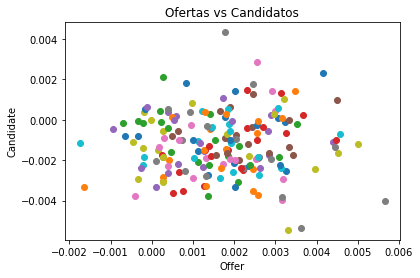

In [56]:
import matplotlib.pyplot as plt
import numpy as np
X = []
Y = [] 
for i in range(len(embeddedOffers)):
    X.append(np.mean(embeddedCandidates186[i]))
    Y.append(np.mean(embeddedOffers[i]))
    plt.scatter(np.mean(embeddedOffers[i]),np.mean(embeddedCandidates186[i]))
    plt.xlabel('Offer') 
    plt.ylabel('Candidate')
    plt.title('Ofertas vs Candidatos')

In [57]:
df = pd.concat([dFinalO,dFinalC])
X = np.array(df.iloc[:,1:])
Y = np.array(Y)

In [58]:
X.shape

(588, 384)

In [59]:
Y.shape

(186,)

In [60]:
XY = X + Y 
#XY = np.array(XY).reshape(372,-1)

ValueError: operands could not be broadcast together with shapes (588,384) (186,) 

#### **KMeans**

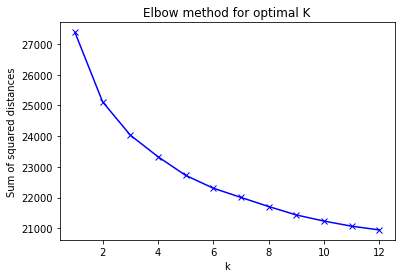

In [53]:
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(1,13)
for k in K:
    km = KMeans(n_clusters = k)
    km = km.fit(XY)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow method for optimal K')
plt.show()

In [54]:
from sklearn.mixture import GaussianMixture
n_clusters = 12
gmm_model = GaussianMixture(n_components=n_clusters)
gmm_model.fit(XY)
cluster_labels = gmm_model.predict(XY)
XY = pd.DataFrame(XY)
X['cluster'] = cluster_labels

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [55]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
modelKmeans = KMeans(n_clusters = 12, init = 'k-means++', n_init= 1)
modelKmeans.fit(XY)
predictions = modelKmeans.predict(XY)
centers = modelKmeans.cluster_centers_
kmeans_silhouette = silhouette_score(XY, modelKmeans.labels_).round(2)

NameError: name 'silhouette_score' is not defined

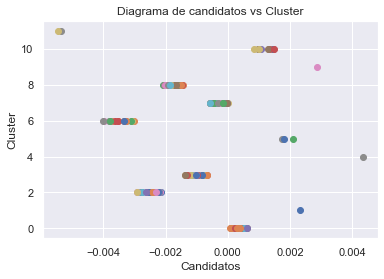

In [501]:
for i in range(len(X)):
    plt.scatter(X[i], predictions[i])
    plt.xlabel('Candidatos')
    plt.ylabel('Cluster')
    plt.title('Diagrama de candidatos vs Cluster')

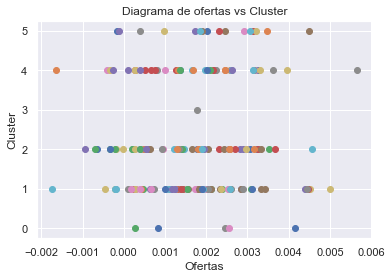

In [499]:
for j in range(len(Y)):
    plt.scatter(Y[j], predictions[j])
    plt.xlabel('Ofertas')
    plt.ylabel('Cluster')
    plt.title('Diagrama de ofertas vs Cluster')

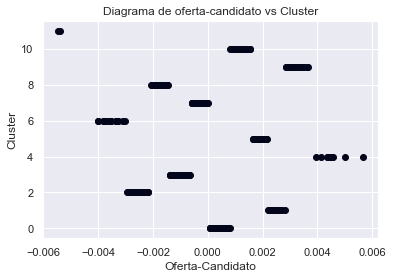

In [503]:
for k in range(len(XY)):
    plt.scatter(XY[k], predictions[k], c = predictions[k])
    plt.xlabel('Oferta-Candidato')
    plt.ylabel('Cluster')
    plt.title('Diagrama de oferta-candidato vs Cluster')

In [509]:
Score_silhouette = silhouette_score(XY, modelKmeans.labels_)
Score_silhouette

0.6005531

### **Clasificador general**

In [35]:
#1.Importar librerias
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

#### **Preprocesamiento de datos**

In [2]:
from sklearn.preprocessing import LabelEncoder
#Variables x 
categoryList = ['Experience', 'Time experience', 'Education Level',
       'Education profile', 'English', 'Second Language', 'Third Language',
       'General Purpose Programming Skills', 'Backend Skills',
       'Frontend Skills', 'Version Control', 'Software Development',
       'Good Practices', 'Microsoft Office', 'IoT', 'Network management',
       'Data Modelling', 'Database design', 'Embedded system',
       'APIs development', 'Bug management', 'Process automation',
       'Solution refining']
softList = ['Sales', 'Teamwork', 'Adaptation', 'Responsability', 'Proactive',
       'Effort', 'Creative', 'Leadership', 'Project Management', 'Passionate',
       'Problem Solving', 'Curious', 'Formality', 'Communication skills',
       'Innovation']
Categories = GeneralSFEN[categoryList]
sofCategories = SoftSFEN[softList]
Job = GeneralSFEN.Job
Job2 = SoftSFEN.Job



NameError: name 'GeneralSFEN' is not defined

#### **Random Forest** 

In [37]:
#Este es un modelo excelente para los datos de Software Engineer
from sklearn import metrics
#Spliteo de datos
xtrain, xtest, ytrain, ytest = train_test_split(Categories, Job, test_size= 0.4, shuffle=True)
#Creacion de modelo
rf = RandomForestClassifier(n_estimators = 50) #En general depende de mucho del split de los datos, sin embargo con más de 50 estimadores la rock curve alcanza un mínimo de 0.625, teniendo en su mayoría resultados de 1 y 0.98
#fit 
rf.fit(xtrain, ytrain)
#predicciones 
ypredRF = rf.predict(xtest)
#Métricas 
print('Acuracy: ', metrics.accuracy_score(ytest, ypredRF))
print("Precision:",metrics.precision_score(ytest, ypredRF))
print('Rock curve: ', metrics.roc_auc_score(ytest,ypredRF))
print('F1-Score: ', metrics.f1_score(ytest,ypredRF))
print('Confussion matrix: ', metrics.confusion_matrix(ytest, ypredRF))
print('Sensitivity: ', metrics.recall_score(ytest, ypredRF))
print('Kappa: ', metrics.cohen_kappa_score(ytest, ypredRF))

Acuracy:  0.9824561403508771
Precision: 0.9824561403508771
Rock curve:  0.5
F1-Score:  0.9911504424778761
Confussion matrix:  [[ 0  1]
 [ 0 56]]
Sensitivity:  1.0
Kappa:  0.0


In [38]:
from sklearn import metrics
#Spliteo de datos
xtrain, xtest, ytrain, ytest = train_test_split(sofCategories, Job2, test_size= 0.4, shuffle=True)
#Creacion de modelo
rf = RandomForestClassifier(n_estimators = 50) #En general depende de mucho del split de los datos, sin embargo con más de 50 estimadores la rock curve alcanza un mínimo de 0.625, teniendo en su mayoría resultados de 1 y 0.98
#fit 
rf.fit(xtrain, ytrain)
#predicciones 
ypredRFS = rf.predict(xtest)
#Métricas 
print('Acuracy: ', metrics.accuracy_score(ytest, ypredRFS))
print("Precision:",metrics.precision_score(ytest, ypredRFS))
print('Rock curve: ', metrics.roc_auc_score(ytest,ypredRFS))
print('F1-Score: ', metrics.f1_score(ytest,ypredRFS))
print('Confussion matrix: ', metrics.confusion_matrix(ytest, ypredRFS))
print('Sensitivity: ', metrics.recall_score(ytest, ypredRFS))
print('Kappa: ', metrics.cohen_kappa_score(ytest, ypredRFS))

Acuracy:  0.9649122807017544
Precision: 0.9821428571428571
Rock curve:  0.49107142857142855
F1-Score:  0.9821428571428571
Confussion matrix:  [[ 0  1]
 [ 1 55]]
Sensitivity:  0.9821428571428571
Kappa:  -0.017857142857143016


#### **GRU Software engineer**

In [39]:
#Este no es un buen modelo
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Softmax
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import BatchNormalization
categorias = len(np.unique(Job))
#Convertir a array para después poder hacer reshape 
Job = np.array(Job)
Categories = np.array(Categories)
#Spliteo
xtrain, xtest, ytrain, ytest = train_test_split(Categories, Job, test_size= 0.3, shuffle=True)
#Reshape para poder dar forma de entrada y porque originalmente era un serie de dataframe 

ModuleNotFoundError: No module named 'tensorflow'

In [612]:
xtrain = np.reshape(-1,1)

In [597]:
xtrain = np.reshape(xtrain, (xtrain.shape[0], xtrain.shape[1],1))

In [598]:
#Modelo GRU
rnn = Sequential([LSTM(units = 750, return_sequences=True, input_shape = (xtrain.shape[1],1), activation= 'relu'), Dense(units= 2000),
                    LSTM(units = 250, return_sequences=True, activation='tanh'), Dropout(0.7),SimpleRNN(units = 100, return_sequences=True, activation = 'relu'),
                    Dropout(0.3), GRU(units = 50, activation='tanh'),Dense(25) , Dense(1, activation = 'sigmoid')]) #Si se elimina la capa Softmax tiene un comportameitno de reaprendizaje, hacer pooling de maximum value 
loss_function = tf.keras.losses.BinaryCrossentropy()
rnn.compile(optimizer='Adam', loss= loss_function, metrics=['accuracy'])
rnn.fit(xtrain,ytrain,epochs= 50, batch_size=5)
rnn.summary()
xtest = np.reshape(xtest, (xtest.shape[0], xtrain.shape[1],1))
ypred = rnn.predict(xtest)
predictions = []
for prediction in ypred:
    prediction = int(np.round(prediction))
    predictions.append(prediction)

Epoch 1/50
20/20 [==============================] - 9s 216ms/step - loss: 0.1875 - accuracy: 0.9592
Epoch 2/50
20/20 [==============================] - 4s 209ms/step - loss: 0.1513 - accuracy: 0.9694
Epoch 3/50
20/20 [==============================] - 4s 217ms/step - loss: 0.1458 - accuracy: 0.9694
Epoch 4/50
20/20 [==============================] - 5s 233ms/step - loss: 0.1515 - accuracy: 0.9694
Epoch 5/50
20/20 [==============================] - 5s 251ms/step - loss: 0.1590 - accuracy: 0.9694
Epoch 6/50
20/20 [==============================] - 5s 262ms/step - loss: 0.1623 - accuracy: 0.9694
Epoch 7/50
20/20 [==============================] - 5s 258ms/step - loss: 0.1506 - accuracy: 0.9694
Epoch 8/50
20/20 [==============================] - 5s 249ms/step - loss: 0.1436 - accuracy: 0.9694
Epoch 9/50
20/20 [==============================] - 5s 249ms/step - loss: 0.1450 - accuracy: 0.9694
Epoch 10/50
20/20 [==============================] - 5s 245ms/step - loss: 0.1398 - accuracy: 0.9694

In [599]:
print('Acuracy: ', metrics.accuracy_score(ytest, predictions))
print("Precision:",metrics.precision_score(ytest, predictions))
print('Rock curve: ', metrics.roc_auc_score(ytest, predictions))
print('F1-Score: ', metrics.f1_score(ytest,predictions))
print('Sensitivity: ', metrics.recall_score(ytest, predictions))
print('Kappa: ', metrics.cohen_kappa_score(ytest, predictions))

Acuracy:  0.9767441860465116
Precision: 0.9767441860465116
Rock curve:  0.5
F1-Score:  0.988235294117647
Sensitivity:  1.0
Kappa:  0.0


In [562]:
len(ypredRF)

57

In [585]:
len(predictions)

43

Text(0.5, 1.0, 'Valors predichos vs reales en GRU para habilidades duras')

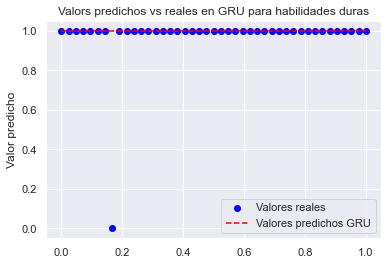

In [628]:
X = np.linspace(0,1,43)
plt.scatter(X, ytest, c = 'blue')
plt.plot(X,predictions, '--', c = 'red')
plt.ylabel('Valor predicho')
plt.legend(['Valores reales', 'Valores predichos GRU'])
plt.title('Valors predichos vs reales en GRU para habilidades duras')

Text(0.5, 1.0, 'Gráfico de habilidades duras GRU')

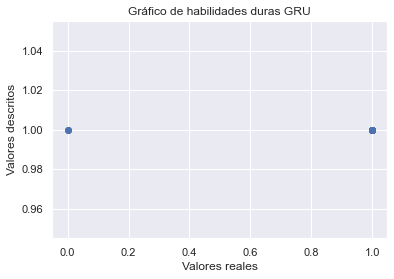

In [579]:
plt.scatter(ytest, predictions)
plt.xlabel('Valores reales')
plt.ylabel('Valores descritos')
plt.title('Gráfico de habilidades duras GRU')

#### **Soft skills**

In [533]:
categoriasSoft = len(np.unique(Job2))
#Convertir a array para después poder hacer reshape 
Job2 = np.array(Job2)
sofCategories = np.array(sofCategories)
#Spliteo
xtrainSF, xtestSF, ytrainSF, ytestSF = train_test_split(sofCategories, Job2, test_size= 0.3, shuffle=True)
#Reshape para poder dar forma de entrada y porque originalmente era un serie de dataframe 
xtrainSF = np.reshape(xtrainSF, (xtrainSF.shape[0], xtrainSF.shape[1],1))

In [549]:
predictionsSF = []
rnnsF = Sequential([LSTM(units = 750, return_sequences=True, input_shape = (xtrainSF.shape[1],1), activation= 'relu'), Dense(units= 2000),
                    LSTM(units = 250, return_sequences=True, activation='tanh'), Dropout(0.7),SimpleRNN(units = 100, return_sequences=True, activation = 'relu'),
                    Dropout(0.3), GRU(units = 50, activation='tanh'),Dense(25) , Dense(1, activation = 'sigmoid')]) #Si se elimina la capa Softmax tiene un comportameitno de reaprendizaje, hacer pooling de maximum value 
loss_function = tf.keras.losses.BinaryCrossentropy()
rnnsF.compile(optimizer='Adam', loss= loss_function, metrics=['accuracy'])
rnnsF.fit(xtrainSF,ytrainSF,epochs= 100, batch_size=5)
xtestSF = np.reshape(xtestSF, (xtestSF.shape[0], xtestSF.shape[1],1))
ypredSF = rnnsF.predict(xtestSF)
for prediction in ypredSF:
    prediction = int(np.round(prediction))
    predictionsSF.append(prediction)
print('Acuracy: ', metrics.accuracy_score(ytestSF, predictionsSF))
print("Precision:",metrics.precision_score(ytestSF, predictionsSF))
print('Rock curve: ', metrics.roc_auc_score(ytestSF, predictionsSF))
print('F1-Score: ', metrics.f1_score(ytestSF,predictionsSF))

Epoch 1/100
20/20 [==============================] - 8s 161ms/step - loss: 0.2478 - accuracy: 0.9490
Epoch 2/100
20/20 [==============================] - 3s 151ms/step - loss: 0.1478 - accuracy: 0.9694
Epoch 3/100
20/20 [==============================] - 3s 164ms/step - loss: 0.1567 - accuracy: 0.9694
Epoch 4/100
20/20 [==============================] - 3s 170ms/step - loss: 0.1640 - accuracy: 0.9694
Epoch 5/100
20/20 [==============================] - 3s 166ms/step - loss: 0.1398 - accuracy: 0.9694
Epoch 6/100
20/20 [==============================] - 3s 160ms/step - loss: 0.1475 - accuracy: 0.9694
Epoch 7/100
20/20 [==============================] - 3s 159ms/step - loss: 0.1449 - accuracy: 0.9694
Epoch 8/100
20/20 [==============================] - 3s 151ms/step - loss: 0.1474 - accuracy: 0.9694
Epoch 9/100
20/20 [==============================] - 3s 154ms/step - loss: 0.1481 - accuracy: 0.9694
Epoch 10/100
20/20 [==============================] - 3s 164ms/step - loss: 0.1415 - accura

Text(0.5, 1.0, 'Valors predichos vs reales en GRU para habilidades blandas')

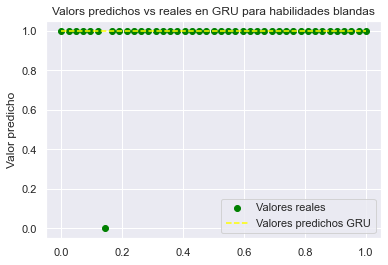

In [630]:
X = np.linspace(0,1,43)
plt.scatter(X, ytestSF, c = 'green')
plt.plot(X,predictionsSF, '--', c = 'yellow')
plt.ylabel('Valor predicho')
plt.legend(['Valores reales', 'Valores predichos GRU'])
plt.title('Valors predichos vs reales en GRU para habilidades blandas')

### **Data Scientist Classifier**

In [12]:
categoryListDSC = ['Experience', 'Time experience', 'Education Level',
       'Education Profile', 'English', 'Second Language', 'Third Language',
       'Microsoft Office', 'General Purpose Programming Skills',
       'Database management', 'Backend skills', 'Data visualization tools',
       'Cloud platforms', 'Machine Learning tools', 'Version control',
       'Deep Learning tools', 'Geografic information systems',
       'Data collection', 'Transforming data', 'Statistics',
       'Solution Architecture']
JobDSC = ProfileDSC.Job
CategoriesDSC = ProfileDSC[categoryListDSC]

In [192]:
from sklearn.naive_bayes import MultinomialNB
xtrain, xtest, ytrain, ytest = train_test_split(CategoriesDSC, JobDSC, test_size= 0.38, shuffle=True)
nb = MultinomialNB()
nb.fit(xtrain,ytrain)
ypredDSC = nb.predict(xtest)
print('Acuracy: ', metrics.accuracy_score(ytest, ypredDSC))
print("Precision:",metrics.precision_score(ytest, ypredDSC))
print('Rock curve: ', metrics.roc_auc_score(ytest,ypredDSC))
print('F1-Score: ', metrics.f1_score(ytest, ypredDSC))

Acuracy:  0.967741935483871
Precision: 0.9836065573770492
Rock curve:  0.4918032786885246
F1-Score:  0.9836065573770492


#### **GRU NN Data Scientist**

In [196]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
JobDSC = np.array(JobDSC)
CategoriesDSC = np.array(CategoriesDSC)
#Spliteo
xtrainDSC, xtestDSC, ytrainDSC, ytestDSC = train_test_split(CategoriesDSC, JobDSC, test_size= 0.3, shuffle=True)

In [198]:
#Modelo GRU
#Reshape para poder dar forma de entrada y porque originalmente era un serie de dataframe 
xtrainDSC = np.reshape(xtrainDSC, (xtrainDSC.shape[0], xtrainDSC.shape[1],1))
rnn = Sequential([LSTM(units = 500, return_sequences=True, input_shape = (xtrainDSC.shape[1],1), activation= 'relu'), Dense(units= 1000),
                    BatchNormalization(), LSTM(units = 250, return_sequences=True, activation='tanh'), Dropout(0.7),SimpleRNN(units = 1000, return_sequences=True, activation = 'relu'),
                    Dropout(0.3), GRU(units = 100, activation='tanh'),Dense(100, activation = 'relu') , BatchNormalization(), Dense(1, activation= 'sigmoid')]) #Si se elimina la capa Softmax tiene un comportameitno de reaprendizaje, hacer pooling de maximum value 
loss_function = tf.keras.losses.BinaryCrossentropy()
rnn.compile(optimizer='Adam', loss= loss_function, metrics=['accuracy'])
rnn.fit(xtrainDSC,ytrainDSC,epochs= 10, batch_size= 5)
rnn.summary()
xtestDSC = np.reshape(xtestDSC, (xtestDSC.shape[0], xtrainDSC.shape[1],1))
ypredDSC = rnn.predict(xtestDSC)
predictionsDSC = []
for i in ypredDSC:
    prediction = int(np.round(i))
    predictions.append(prediction)


Epoch 1/10
23/23 [==============================] - 9s 150ms/step - loss: 0.7276 - accuracy: 0.5714
Epoch 2/10
23/23 [==============================] - 4s 153ms/step - loss: 0.5770 - accuracy: 0.6429
Epoch 3/10
23/23 [==============================] - 3s 146ms/step - loss: 0.4501 - accuracy: 0.9018
Epoch 4/10
23/23 [==============================] - 4s 163ms/step - loss: 0.3698 - accuracy: 0.9554
Epoch 5/10
23/23 [==============================] - 4s 173ms/step - loss: 0.2884 - accuracy: 0.9554
Epoch 6/10
23/23 [==============================] - 4s 157ms/step - loss: 0.2654 - accuracy: 0.9643
Epoch 7/10
23/23 [==============================] - 4s 160ms/step - loss: 0.2098 - accuracy: 0.9643
Epoch 8/10
23/23 [==============================] - 4s 154ms/step - loss: 0.2219 - accuracy: 0.9643
Epoch 9/10
23/23 [==============================] - 4s 157ms/step - loss: 0.1783 - accuracy: 0.9643
Epoch 10/10
23/23 [==============================] - 4s 160ms/step - loss: 0.1748 - accuracy: 0.9643

In [199]:
predictionsDSC = []
for i in ypredDSC:
    prediction = int(np.round(i))
    predictionsDSC.append(prediction)
print('Acuracy: ', metrics.accuracy_score(ytestDSC, predictionsDSC))
print("Precision:",metrics.precision_score(ytestDSC, predictionsDSC))
print('Rock curve: ', metrics.roc_auc_score(ytestDSC, predictionsDSC))
print('F1-Score: ', metrics.f1_score(ytestDSC, predictionsDSC))
display_summary(ytestDSC, predictionsDSC)

Acuracy:  0.9795918367346939
Precision: 0.9795918367346939
Rock curve:  0.5
F1-Score:  0.9896907216494846
confusion matrix
[[48  1]
 [ 0  0]]
sensitivity is %f 1.0
specificity is %f 0.0
accuracy is %f 0.9795918367346939
balanced accuracy is % 0.5


In [200]:
#confussion matrix 
print('Confussion matrix: ', metrics.confusion_matrix(ytestDSC, predictionsDSC))
print('Sensitivity: ', metrics.recall_score(ytestDSC, predictionsDSC))
print('Kappa: ', metrics.cohen_kappa_score(ytestDSC, predictionsDSC))


Confussion matrix:  [[ 0  1]
 [ 0 48]]
Sensitivity:  1.0
Kappa:  0.0


In [201]:
from sklearn import metrics
xtrainDSC, xtestDSC, ytrainDSC, ytestDSC = train_test_split(CategoriesDSC, JobDSC, test_size= 0.3, shuffle=True)
#Creacion de modelo
rf = RandomForestClassifier(n_estimators = 300) #En general depende de mucho del split de los datos, sin embargo con más de 50 estimadores la rock curve alcanza un mínimo de 0.625, teniendo en su mayoría resultados de 1 y 0.98
#fit 
rf.fit(xtrainDSC, ytrainDSC)
#predicciones 
ypredDSC = rf.predict(xtestDSC)
#Métricas 
print('Acuracy: ', metrics.accuracy_score(ytestDSC, ypredDSC))
print("Precision:",metrics.precision_score(ytestDSC, ypredDSC))
print('Rock curve: ', metrics.roc_auc_score(ytestDSC,ypredDSC))
print('F1-Score: ', metrics.f1_score(ytestDSC,ypredDSC))
#confussion matrix 
print('Confussion matrix: ', metrics.confusion_matrix(ytestDSC, predictionsDSC))
print('Sensitivity: ', metrics.recall_score(ytestDSC, ypredDSC))
print('Kappa: ', metrics.cohen_kappa_score(ytestDSC, ypredDSC))

Acuracy:  0.9795918367346939
Precision: 0.9795918367346939
Rock curve:  0.5
F1-Score:  0.9896907216494846
Confussion matrix:  [[ 0  1]
 [ 0 48]]
Sensitivity:  1.0
Kappa:  0.0


#### **Imbalanced data**

In [101]:
from sklearn.linear_model import RidgeClassifier
xtrainDSC, xtestDSC, ytrainDSC, ytestDSC = train_test_split(CategoriesDSC, JobDSC, test_size= 0.3, shuffle=True)
#Creacion de modelo
RidgeC = RidgeClassifier() #En general depende de mucho del split de los datos, sin embargo con más de 50 estimadores la rock curve alcanza un mínimo de 0.625, teniendo en su mayoría resultados de 1 y 0.98
#fit 
RidgeC.fit(xtrainDSC, ytrainDSC)
#predicciones 
ypredDSC = RidgeC.predict(xtestDSC)
#Métricas 
print('Acuracy: ', metrics.accuracy_score(ytestDSC, ypredDSC))
print("Precision:",metrics.precision_score(ytestDSC, ypredDSC))
print('Rock curve: ', metrics.roc_auc_score(ytestDSC,ypredDSC))
print('F1-Score: ', metrics.f1_score(ytestDSC,ypredDSC))
print('Confussion matrix: ', metrics.confusion_matrix(ytestDSC, predictionsDSC))
print('Sensitivity: ', metrics.recall_score(ytestDSC, ypredDSC))
print('Kappa: ', metrics.cohen_kappa_score(ytestDSC, ypredDSC))

Acuracy:  0.9795918367346939
Precision: 0.9795918367346939
Rock curve:  0.5
F1-Score:  0.9896907216494846
Confussion matrix:  [[ 0  1]
 [ 0 48]]
Sensitivity:  1.0
Kappa:  0.0


In [142]:
def display_summary(true,pred):
    tn, fp, fn, tp = confusion_matrix(true,pred).ravel()
    print('confusion matrix')
    print(np.array([[tp,fp],[fn,tn]]))
    print('sensitivity is %f',1.*tp/(tp+fn))
    print('specificity is %f',1.*tn/(tn+fp))
    print('accuracy is %f',1.*(tp+tn)/(tp+tn+fp+fn))
    print('balanced accuracy is %',1./2*(1.*tp/(tp+fn)+1.*tn/(tn+fp)))

In [216]:
from sklearn import metrics
#Spliteo de datos
xtrainDSC, xtestDSC, ytrainDSC, ytestDSC = train_test_split(CategoriesDSC, JobDSC, test_size= 0.38, shuffle=True)
#Creacion de modelo
rf = RandomForestClassifier(n_estimators = 2000, criterion= 'gini' , min_samples_split= 1000, min_samples_leaf=150) #En general depende de mucho del split de los datos, sin embargo con más de 50 estimadores la rock curve alcanza un mínimo de 0.625, teniendo en su mayoría resultados de 1 y 0.98
#fit 
rf.fit(xtrainDSC, ytrainDSC)
#predicciones 
ypredDSC = rf.predict(xtestDSC)
#Métricas 
print('Acuracy: ', metrics.accuracy_score(ytestDSC, ypred))
print("Precision:",metrics.precision_score(ytestDSC, ypred))
print('Rock curve: ', metrics.roc_auc_score(ytestDSC,ypred))
print('F1-Score: ', metrics.f1_score(ytestDSC,ypred))
print('Confussion matrix: ', metrics.confusion_matrix(ytestDSC, ypred))
print('Sensitivity: ', metrics.recall_score(ytestDSC, ypred))
print('Kappa: ', metrics.cohen_kappa_score(ytestDSC, ypred))

Acuracy:  0.967741935483871
Precision: 0.967741935483871
Rock curve:  0.5
F1-Score:  0.9836065573770492
Confussion matrix:  [[ 0  2]
 [ 0 60]]
Sensitivity:  1.0
Kappa:  0.0


In [73]:
xtrainDSC = np.reshape(xtrainDSC, (xtrainDSC.shape[0], xtrainDSC.shape[1],1))
def RNNDataScience():
    rnn = Sequential([LSTM(units = 750, return_sequences=True, input_shape = (xtrainDSC.shape[1],1), activation= 'relu'), Dense(units= 2000),
                    BatchNormalization(), LSTM(units = 250, return_sequences=True, activation='tanh'), Dropout(0.7),SimpleRNN(units = 100, return_sequences=True, activation = 'relu'),
                    Dropout(0.3), GRU(units = 50, activation='tanh'),Dense(25) , BatchNormalization(), Dense(1, activation= 'sigmoid')]) #Si se elimina la capa Softmax tiene un comportameitno de reaprendizaje, hacer pooling de maximum value 
    loss_function = tf.keras.losses.BinaryCrossentropy()
    rnn.compile(optimizer='Adam', loss= loss_function, metrics=['accuracy'])
    return rnn

In [77]:
# evaluate model with standardized dataset
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
estimator = KerasClassifier(build_fn= RNNDataScience, epochs=20, batch_size=5, verbose=0)
kfold = StratifiedKFold(n_splits=5, shuffle=True)
results = cross_val_score(estimator, CategoriesDSC, JobDSC, cv=kfold)
print("RNN: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

C:\Users\Fernando.DESKTOP-608G9HT\AppData\Local\Temp/ipykernel_21524/1494740822.py:5: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasClassifier(build_fn= RNNDataScience, epochs=20, batch_size=5, verbose=0)


RNN: 96.89% (0.04%)
